In [542]:
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [543]:
#path="C:\\Users\jsciamma\Documents\Patrick\ML\Kaggle\Titanic"
path="C:\\Users\Patrick\ML\Titanic"

In [544]:
os.chdir(path)
os.getcwd()

'C:\\Users\\Patrick\\ML\\Titanic'

In [730]:
train = pd.read_csv("data\\train.csv")
test = pd.read_csv("data\\test.csv")

In [731]:
train.shape

(891, 12)

In [732]:
test.shape

(418, 11)

In [733]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [734]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [735]:
pd.merge(train, test).info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 12 columns):
PassengerId    0 non-null int64
Survived       0 non-null int64
Pclass         0 non-null int64
Name           0 non-null object
Sex            0 non-null object
Age            0 non-null float64
SibSp          0 non-null int64
Parch          0 non-null int64
Ticket         0 non-null object
Fare           0 non-null float64
Cabin          0 non-null object
Embarked       0 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 0.0+ bytes


## extract title

In [554]:
s = train.Name.str.extract(',\s+([\w\s]+)\.', expand=False)
print(s.value_counts())
print("null values", sum(s.isnull()))
print(train.Name[s.isnull()])

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Mme               1
Jonkheer          1
Capt              1
Don               1
Lady              1
Sir               1
the Countess      1
Ms                1
Name: Name, dtype: int64
null values 0
Series([], Name: Name, dtype: object)


In [639]:
def convert_title(s, Sex):
    if s in { 'Major', 'Col', 'Sir', 'Don', 'Capt', 'Jonkheer'}:
        return 'Mr'
    if s in {'Mlle', 'Ms'}:
        return 'Miss'
    if s in {'Mme', 'Lady', 'the Countess'}:
        return 'Mrs'
    if s == 'Dr':
        if Sex == "male":
            return "Mr"
        else:
            return "Mrs"
    return s

#print(list(zip(s.unique(),map(convert_title, s.unique()))))
train['Title'] = list(map(convert_title, s, train.Sex))
train.Title.value_counts()

Mr        531
Miss      185
Mrs       129
Master     40
Rev         6
Name: Title, dtype: int64

## extract last name

In [725]:
s = train.Name.str.extract('^([\w\s\-\']+),', expand=False)
#print(s.value_counts())
#print("null values", sum(s.isnull()))
#print(train.Name[s.isnull()])
train['LastName'] = s
train.LastName.value_counts()
train[train.LastName=='Sage']
#train[train.Ticket=='3101281']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,WomanInThird,ManInFirst,LastName
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Master,False,False,Sage
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,True,False,Sage
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,False,False,Sage
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,False,False,Sage
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,True,False,Sage
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Mr,False,False,Sage
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Miss,True,False,Sage


## Check and correct Embarked null values

In [635]:
# check and correct null Embarked values
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,WomanInThird
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,False
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,False


In [636]:
pd.pivot_table(train[train.Pclass==1], values='Fare', columns = 'Embarked', aggfunc='mean')

Embarked,C,Q,S
Fare,104.718529,90.0,70.364862


In [558]:
pd.pivot_table(train, values='Survived', columns = ['Pclass', 'Sex'], index='Title', aggfunc='mean')

Pclass         1                   2                3          
Sex       female      male    female      male female      male
Title                                                          
Master       NaN  1.000000       NaN  1.000000    NaN  0.392857
Miss    0.958333       NaN  0.942857       NaN    0.5       NaN
Mr           NaN  0.352941       NaN  0.086022    NaN  0.112853
Mrs     0.978261       NaN  0.902439       NaN    0.5       NaN
Rev          NaN       NaN       NaN  0.000000    NaN       NaN

## add dummy variables for women in 3rd class and men in first

In [633]:
train['WomanInThird'] = (train.Sex=='female') & (train.Pclass==3)

In [663]:
train['ManInFirst'] = (train.Title=='Mr') & (train.Pclass==1)

In [559]:
pd.pivot_table(train, values='Survived', columns = ['Pclass', 'Sex'], index='Title', aggfunc='count')

Pclass      1             2            3       
Sex    female   male female  male female   male
Title                                          
Master    NaN    3.0    NaN   9.0    NaN   28.0
Miss     48.0    NaN   35.0   NaN  102.0    NaN
Mr        NaN  119.0    NaN  93.0    NaN  319.0
Mrs      46.0    NaN   41.0   NaN   42.0    NaN
Rev       NaN    NaN    NaN   6.0    NaN    NaN

In [578]:
pd.pivot_table(train[(train.Title=='Master') & (train.Pclass==3)], values='Survived', columns = ['Parch'], index=['SibSp'], aggfunc='mean')

Parch,0,1,2
SibSp,,,
0,NaN,1.0,1.000000
1,1.0,1.0,1.000000
3,NaN,0.0,0.000000
4,NaN,0.0,0.333333
5,NaN,NaN,0.000000
8,NaN,NaN,0.000000


In [593]:
pd.pivot_table(train[(train.Age<10) & (train.Pclass==3)], values='Survived', columns = ['Title', 'SibSp'], index=['Parch'], aggfunc='mean')

Title Master                               Miss                          
SibSp      0    1    3         4    5         0         1    2    3     4
Parch                                                                    
0        NaN  NaN  NaN       NaN  NaN  1.000000       NaN  NaN  NaN   NaN
1        1.0  1.0  0.0  0.000000  NaN  0.666667  0.666667  1.0  0.0   NaN
2        1.0  1.0  0.0  0.333333  0.0  1.000000       NaN  0.0  0.0  0.25

In [638]:
# passengers 62 and 830
train.at[61, 'Embarked'] = "S"
print(train.iloc[61])
train.at[829, 'Embarked'] = "S"
print(train.iloc[829])

PassengerId                      62
Survived                          1
Pclass                            1
Name            Icard, Miss. Amelie
Sex                          female
Age                              38
SibSp                             0
Parch                             0
Ticket                       113572
Fare                             80
Cabin                           B28
Embarked                          S
Title                          Miss
WomanInThird                  False
Name: 61, dtype: object
PassengerId                                           830
Survived                                                1
Pclass                                                  1
Name            Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                                female
Age                                                    62
SibSp                                                   0
Parch                                                   0
Ticket  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009FAD0FB4A8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000009FAD675C18>]], dtype=object)

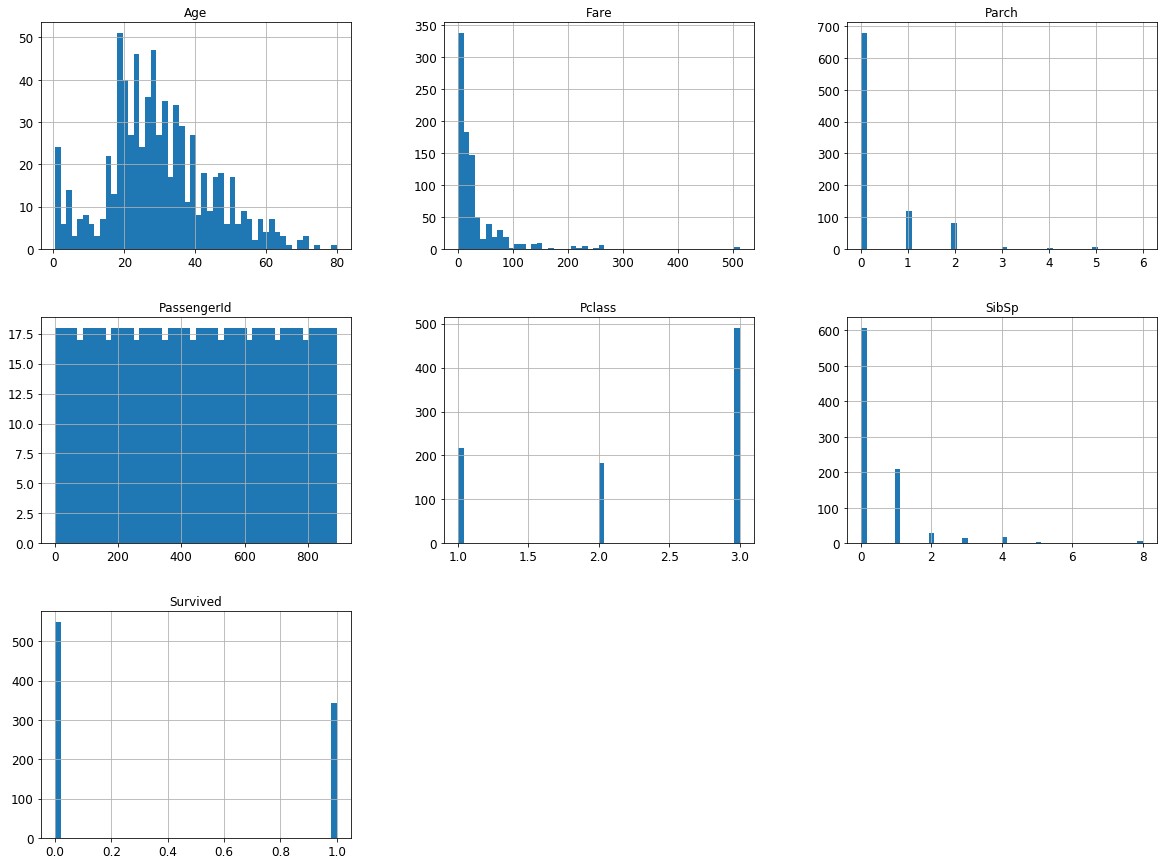

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))

In [49]:
train[train.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [46]:
sum(train['Fare']=='')

C:\Users\jsciamma\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [24]:
y = train['Survived']

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[fields], train['Survived'], random_state=0)

In [142]:
titanic=X_train.copy()
titanic['Survived']=y_train
titanic['Sex'] = np.where(titanic['Sex'] == 'male', 1, 0)

In [143]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 105 to 684
Data columns (total 5 columns):
Pclass      668 non-null int64
Sex         668 non-null int32
SibSp       668 non-null int64
Parch       668 non-null int64
Survived    668 non-null int64
dtypes: int32(1), int64(4)
memory usage: 28.7 KB


In [123]:
corr_matrix=titanic.corr()

In [532]:
pd.pivot_table(titanic, values='Survived', columns = 'Sex', index='Pclass', aggfunc='mean')

NameError: name 'titanic' is not defined

In [125]:
pd.pivot_table(titanic, values='Survived', columns = 'Sex',  aggfunc='mean')

Sex,0,1
Survived,0.753247,0.19222


In [127]:
pd.pivot_table(titanic, values='Survived', columns = 'Pclass',  aggfunc='mean')

Pclass,1,2,3
Survived,0.613497,0.492754,0.245232


In [126]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Parch       0.081584
SibSp      -0.050014
Pclass     -0.326264
Sex        -0.548061
Name: Survived, dtype: float64

In [128]:
titanic['WomanInFirst'] = (1-titanic['Sex']) * (titanic['Pclass']==1)

In [131]:
titanic['WomanInFirst'].value_counts()

0    597
1     71
Name: WomanInFirst, dtype: int64

In [133]:
corr_matrix=titanic.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived        1.000000
WomanInFirst    0.404806
Parch           0.081584
SibSp          -0.050014
Pclass         -0.326264
Sex            -0.548061
Name: Survived, dtype: float64

In [511]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[fields], train['Survived'], random_state=0)

In [207]:
from sklearn.preprocessing import LabelBinarizer
Pclass = X_train.Pclass
Pclassencoder = LabelBinarizer(sparse_output=False)
Pclassencoder.fit(Pclass)
Pclass_encoded = Pclassencoder.transform(Pclass)


In [208]:
Sex = X_train.Sex
Sexencoder = LabelBinarizer(sparse_output=False)
Sexencoder.fit(Sex)
Sex_encoded = Sexencoder.transform(Sex)

In [209]:
Embarked = X_train.Embarked
Embarkedencoder = LabelBinarizer(sparse_output=False)
Embarkedencoder.fit(Embarked)
Embarked_encoded = Embarkedencoder.transform(Embarked)

In [284]:
Title = X_train.Title
Titleencoder = LabelBinarizer(sparse_output=False)
Titleencoder.fit(Title)
Title_encoded = Titleencoder.transform(Title)
Title_encoded
Titleencoder.classes_

array(['Master', 'Miss', 'Mr', 'Mrs'], 
      dtype='<U6')

In [246]:
SibSp = X_train.Title
SibSpencoder = LabelBinarizer(sparse_output=False)
SibSpencoder.fit(SibSp)
SibSp_encoded = SibSpencoder.transform(Title)
SibSp_encoded

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       ..., 
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]], dtype=int32)

In [539]:
train.Embarked.describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [289]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values



## last check before preprocessing

In [664]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        891 non-null object
Title           891 non-null object
WomanInThird    891 non-null bool
ManInFirst      891 non-null bool
dtypes: bool(2), float64(2), int64(5), object(6)
memory usage: 71.4+ KB


In [665]:
for c in['Sex', 'Title', 'Embarked', 'WomanInThird', 'ManInFirst']:
    print(c, "\n")
    print("data type ", train[c].dtype, "\n")
    print("value counts:\n", train[c].value_counts(), "\n")

Sex 

data type  object 

value counts:
 male      577
female    314
Name: Sex, dtype: int64 

Title 

data type  object 

value counts:
 Mr        531
Miss      185
Mrs       129
Master     40
Rev         6
Name: Title, dtype: int64 

Embarked 

data type  object 

value counts:
 S    646
C    168
Q     77
Name: Embarked, dtype: int64 

WomanInThird 

data type  bool 

value counts:
 False    747
True     144
Name: WomanInThird, dtype: int64 

ManInFirst 

data type  bool 

value counts:
 False    772
True     119
Name: ManInFirst, dtype: int64 



In [653]:
for c in ['Pclass', 'SibSp', 'Parch']:
    print("data type ", train[c].dtype, "\n")
    print("value counts:\n", train[c].value_counts(), "\n")

data type  int64 

value counts:
 3    491
1    216
2    184
Name: Pclass, dtype: int64 

data type  int64 

value counts:
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 

data type  int64 

value counts:
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 



In [666]:
#X_train_converted = np.c_[X_train.drop(['Pclass', 'Sex', 'Embarked', 'Title', 'SibSp'], axis=1), 
#                          Pclass_encoded, Sex_encoded, Embarked_encoded, Title_encoded, SibSp_encoded]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, train['Survived'], random_state=0)

#num_attribs = ['Pclass', 'SibSp' ,'Parch']
#cat_attribs = ['Sex', 'Embarked', 'Title']
# 'WomanInThird'
num_attribs = ['Pclass', 'SibSp', 'Parch', 'WomanInThird', 'ManInFirst']
cat_attribs = ['Sex', 'Embarked', 'Title']
#cat_attribs = ['Title']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('encoder', OneHotEncoder()),
])

# can't get LabelBinarizer to work on a list of columns so creating a list of pipelines
cat_pipelines = [( cat,
    Pipeline([
    ('selector', DataFrameSelector(cat)),
    ('encoder', LabelBinarizer()),
])) for cat in cat_attribs]

cat_pipeline = FeatureUnion(transformer_list = cat_pipelines)

full_pipeline = FeatureUnion(transformer_list =[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),    
])

X_train_converted = full_pipeline.fit_transform(X_train).toarray()

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
class FieldConverter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        SexInt = np.where(X['Sex'] == 'male', 1, 0)
        return np.c_[X.drop('Sex', axis=1), SexInt]

In [ ]:
class FieldBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        SexInt = np.where(X['Sex'] == 'male', 1, 0)
        return np.c_[X.drop('Sex', axis=1), SexInt]

In [321]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[fields], train['Survived'], random_state=0)

In [15]:
field_converter=FieldConverter()
X_train_converted = field_converter.transform(X_train)

In [16]:
X_train.head()

,Pclass,Sex,SibSp,Parch
105,3,male,0,0
68,3,female,4,2
253,3,male,1,0
320,3,male,0,0
706,2,female,0,0


In [249]:
X_train_converted

array([[0, 0, 0, ..., 0, 1, 0],
       [2, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 0]], dtype=int64)

In [24]:
X_train_converted2 = X_train_converted[:, 1:]

In [25]:
X_train_converted2

array([[0, 0, 1],
       [4, 2, 0],
       [1, 0, 1],
       ..., 
       [0, 0, 1],
       [1, 0, 0],
       [1, 1, 1]], dtype=int64)

# Field conversion from scratch

In [322]:
X_train_converted.shape

(668, 25)

# Fit

In [339]:
from sklearn.linear_model import LogisticRegression
#log_reg_clf = Pipeline((
#    ("scaler", StandardScaler()),
#    ("log_reg", LogisticRegression())))

log_reg_clf = LogisticRegression()
log_reg_clf.fit(X_train_converted, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [340]:
sum(log_reg_clf.predict(X_train_converted)==y_train)/len(y_train)

0.83532934131736525

In [341]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg_clf, X_train_converted, y_train,
                        scoring="accuracy", cv=10)
scores.mean()

0.83245137946630476

In [346]:
from sklearn.ensemble import RandomForestClassifier
forest_class = RandomForestClassifier(oob_score=True, n_estimators=100)
forest_class.fit(X_train_converted, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [343]:
sum(forest_class.predict(X_train_converted)==y_train)/len(y_train)

0.85479041916167664

In [347]:
forest_class.oob_score_

0.79491017964071853

In [345]:
forest_class.feature_importances_

array([ 0.05973113,  0.03049769,  0.08866177,  0.03545565,  0.02900832,
        0.00675961,  0.00862808,  0.01433072,  0.00419964,  0.00481293,
        0.02982781,  0.01966544,  0.0154364 ,  0.00130057,  0.00126667,
        0.00460494,  0.00161985,  0.16715138,  0.024126  ,  0.01806192,
        0.02804414,  0.01917198,  0.04504818,  0.26221096,  0.08037823])

In [229]:
?RandomForestClassifier

In [214]:
forest_reg.predict(X_train_converted)

array([ 0.15560556,  0.38285714,  0.09663456,  0.15560556,  0.8771679 ,
        0.15560556,  0.41439727,  0.15560556,  1.        ,  0.64242312,
        0.64242312,  0.31361173,  0.09663456,  0.95953643,  1.        ,
        1.        ,  0.15560556,  0.15560556,  1.        ,  0.15560556,
        0.1067334 ,  1.        ,  0.41439727,  0.64242312,  0.15560556,
        0.15560556,  0.69333333,  0.15560556,  0.        ,  0.46833333,
        0.1067334 ,  0.14285714,  0.59984163,  0.64242312,  0.15560556,
        0.29333333,  0.15560556,  0.15560556,  0.        ,  0.15560556,
        0.31361173,  0.15560556,  0.09663456,  0.64242312,  0.31361173,
        0.31361173,  1.        ,  0.        ,  0.18841991,  0.59984163,
        0.60093795,  0.18841991,  0.15560556,  0.15560556,  0.15560556,
        0.64242312,  0.64242312,  0.15560556,  0.59984163,  0.31361173,
        0.95953643,  0.15560556,  0.15560556,  0.41439727,  0.        ,
        0.1067334 ,  0.31361173,  0.1067334 ,  0.08116356,  0.61

In [368]:
from sklearn.ensemble import RandomForestClassifier
forest_class = RandomForestClassifier( n_estimators=100)
forest_class.fit(X_train_converted, y_train)
scores = cross_val_score(forest_class, X_train_converted, y_train,
                        scoring="accuracy", cv=10)
scores.mean()

0.81139755766621435

In [103]:
?cross_val_score

In [351]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=0.5, loss="hinge"))))

polynomial_svm_clf.fit(X_train_converted, y_train)
(polynomial_svm_clf.predict(X_train_converted) == y_train).mean()

0.85479041916167664

In [352]:
scores = cross_val_score(polynomial_svm_clf, X_train_converted, y_train,
                        scoring="accuracy", cv=10)
scores.mean()

0.7964269561284486

In [400]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=0.01))))
poly_kernel_svm_clf.fit(X_train_converted, y_train)
(poly_kernel_svm_clf.predict(X_train_converted) == y_train).mean()

0.83383233532934131

In [401]:
scores = cross_val_score(poly_kernel_svm_clf, X_train_converted, y_train,
                        scoring="accuracy", cv=10)
scores.mean()

0.82643600180913612

In [384]:
from sklearn.svm import SVC
rbf_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ("rbf_clf", SVC(kernel="rbf", gamma=1, C=0.1))))
rbf_kernel_svm_clf.fit(X_train_converted, y_train)
(rbf_kernel_svm_clf.predict(X_train_converted) == y_train).mean()

0.85479041916167664

In [385]:
scores = cross_val_score(rbf_kernel_svm_clf, X_train_converted, y_train,
                        scoring="accuracy", cv=10)
scores.mean()

0.75590230664857527

In [445]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = Pipeline((
    ('scaler', StandardScaler()),
    ("knn_clf", KNeighborsClassifier(n_neighbors=10, weights='uniform'))
))
knn_clf.fit(X_train_converted, y_train)
scores = cross_val_score(knn_clf, X_train_converted, y_train,
                        scoring="accuracy", cv=10)
scores.mean()

0.81897331524197203

In [425]:
?KNeighborsClassifier

In [402]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('rf', forest_class), ('poly', poly_kernel_svm_clf), ('logreg', log_reg)]
)

voting_clf.fit(X_train_converted, y_train)
scores = cross_val_score(voting_clf, X_train_converted, y_train,
                        scoring="accuracy", cv=10)
scores.mean()

0.83245137946630476

# Model fit (streamlined)

In [711]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

def InitModels():
    models=[]
    models.append(("log_reg_clf", LogisticRegression()))
    models.append(("forest_class",  RandomForestClassifier(n_estimators=100)))
    models.append(("poly_svm_clf", Pipeline((
        ("poly_features", PolynomialFeatures(degree=2)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=0.5, loss="hinge"))))
                  ))
    models.append(("rbf_kernel_svm_clf", Pipeline((
        ('scaler', StandardScaler()),
        ("rbf_clf", SVC(kernel="rbf", gamma=1, C=0.1))))
                  ))
    models.append(("poly_kernel_svm_clf", Pipeline((
        ('scaler', StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=0.01))))
                  ))
    models.append(("knn_clf", Pipeline((
        ('scaler', StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='brute'))))
        ))

    models.append(("voting_clf", VotingClassifier(
        estimators=[models[0], models[4]])
                  ))
    return models


In [412]:
?LogisticRegression()

In [710]:
def print_cv_scores(models, X_train_converted, y_train):
    for m in models:
        scores = cross_val_score(m[1], X_train_converted, y_train,
                            scoring="accuracy", cv=10)
        print(m[0], " cross validated score: ", scores.mean())

def fit_models(models, X_train_converted, y_train):
    for m in models:
        m[1].fit(X_train_converted, y_train)
        
def print_accuracy_training_set(models, X_train_converted, y_train):
    for m in models:
        accuracy = (m[1].predict(X_train_converted) == y_train).mean()
        print(m[0], " training set accuracy: ", accuracy)
        
models_full = InitModels()
print_cv_scores(models_full, X_train_converted, y_train)
fit_models(models_full, X_train_converted, y_train)
print_accuracy_training_set(models_full, X_train_converted, y_train)

log_reg_clf  cross validated score:  0.833966530981
forest_class  cross validated score:  0.806897331524
poly_svm_clf  cross validated score:  0.79038896427
rbf_kernel_svm_clf  cross validated score:  0.760379918589
poly_kernel_svm_clf  cross validated score:  0.827928539123


ValueError: Expected n_neighbors > 0. Got 0

In [708]:
models_full[5][1].score(X_train_converted, y_train)
models_full[5][1].classes_

array([0, 1], dtype=int64)

In [703]:
dir(models_full[5][1])

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_inverse_transform',
 '_pairwise',
 '_replace_step',
 '_set_params',
 '_transform',
 '_validate_names',
 '_validate_steps',
 'classes_',
 'decision_function',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'named_steps',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'steps',
 'transform']

In [700]:
?KNeighborsClassifier

In [686]:
# cross validate on subsets
models_ManInFirst = InitModels()

print_cv_scores(models_ManInFirst, X_train_converted[X_train.ManInFirst], y_train[X_train.ManInFirst])
print("\n")
fit_models(models_ManInFirst, X_train_converted[X_train.ManInFirst], y_train[X_train.ManInFirst])
print("\n")
print_accuracy_training_set(models_ManInFirst, X_train_converted[X_train.ManInFirst], y_train[X_train.ManInFirst])


log_reg_clf  cross validated score:  0.663888888889
forest_class  cross validated score:  0.651388888889
poly_svm_clf  cross validated score:  0.6625
rbf_kernel_svm_clf  cross validated score:  0.675
poly_kernel_svm_clf  cross validated score:  0.675
knn_clf  cross validated score:  0.675
voting_clf  cross validated score:  0.675




log_reg_clf  training set accuracy:  0.707865168539
forest_class  training set accuracy:  0.719101123596
poly_svm_clf  training set accuracy:  0.707865168539
rbf_kernel_svm_clf  training set accuracy:  0.674157303371
poly_kernel_svm_clf  training set accuracy:  0.674157303371
knn_clf  training set accuracy:  0.707865168539
voting_clf  training set accuracy:  0.674157303371


In [701]:
# cross validate on subsets
models_WomanInThird = InitModels()

print_cv_scores(models_WomanInThird, X_train_converted[X_train.WomanInThird], y_train[X_train.WomanInThird])
print("\n")
fit_models(models_WomanInThird, X_train_converted[X_train.WomanInThird], y_train[X_train.WomanInThird])
print("\n")
print_accuracy_training_set(models_WomanInThird, X_train_converted[X_train.WomanInThird], y_train[X_train.WomanInThird])

log_reg_clf  cross validated score:  0.598282828283
forest_class  cross validated score:  0.497171717172
poly_svm_clf  cross validated score:  0.499898989899
rbf_kernel_svm_clf  cross validated score:  0.510101010101
poly_kernel_svm_clf  cross validated score:  0.539191919192
knn_clf  cross validated score:  0.404646464646
voting_clf  cross validated score:  0.598282828283




log_reg_clf  training set accuracy:  0.686274509804
forest_class  training set accuracy:  0.735294117647
poly_svm_clf  training set accuracy:  0.735294117647
rbf_kernel_svm_clf  training set accuracy:  0.725490196078
poly_kernel_svm_clf  training set accuracy:  0.539215686275
knn_clf  training set accuracy:  0.598039215686
voting_clf  training set accuracy:  0.686274509804


In [669]:
for m in models:
    accuracy = (m[1].predict(X_train_converted) == y_train).mean()
    print(m[0], " training set accuracy: ", accuracy)


log_reg_clf  training set accuracy:  0.841317365269
forest_class  training set accuracy:  0.854790419162
poly_svm_clf  training set accuracy:  0.850299401198
rbf_kernel_svm_clf  training set accuracy:  0.854790419162
poly_kernel_svm_clf  training set accuracy:  0.833832335329
knn_clf  training set accuracy:  0.826347305389
voting_clf  training set accuracy:  0.841317365269


# Error analysis

In [670]:
accuracy = (models[0][1].predict(X_train_converted) == y_train).astype(int)
X_train2 = X_train.copy()
X_train2['accuracy'] = accuracy
X_train2['predicted'] = models[0][1].predict(X_train_converted)
X_train2.pivot_table(index="Pclass", columns=['Sex'], values="accuracy")

Sex,female,male
Pclass,,
1,0.957746,0.684783
2,0.913793,0.912500
3,0.686275,0.886792


In [632]:
df = X_train2[(X_train2.Pclass==3) & (X_train2.Sex=='female') ]
df.pivot_table(index='Title', values=['predicted', 'Survived'])

,Survived,predicted
Title,,
Miss,0.520000,0.786667
Mrs,0.518519,0.888889


In [630]:
df.pivot_table(index='Title', values='Survived')

,Survived
Title,
Miss,0.520000
Mrs,0.518519


In [628]:
?X_train.pivot_table

In [602]:
train2.pivotTable?
pd.pivot_table(train[train.Pclass==1], values='Fare', columns = 'Embarked', aggfunc='mean')

Object `train2.pivotTable` not found.


In [609]:
a=True
?np.as_type()

Object `np.as_type` not found.


# Test

In [671]:
X_test_converted = full_pipeline.transform(X_test).toarray()

In [672]:
for m in models:
    accuracy = (m[1].predict(X_test_converted) == y_test).mean()
    print(m[0], " testing set accuracy: ", accuracy)


log_reg_clf  testing set accuracy:  0.816143497758
forest_class  testing set accuracy:  0.80269058296
poly_svm_clf  testing set accuracy:  0.834080717489
rbf_kernel_svm_clf  testing set accuracy:  0.775784753363
poly_kernel_svm_clf  testing set accuracy:  0.811659192825
knn_clf  testing set accuracy:  0.816143497758
voting_clf  testing set accuracy:  0.816143497758


In [371]:
sum(log_reg_clf.predict(X_test_converted)==y_test)/len(y_test)

0.80717488789237668

In [403]:
sum(voting_clf.predict(X_test_converted)==y_test)/len(y_test)

0.81165919282511212

In [405]:
models=
for model_name, model in z

# Submission